<a href="https://colab.research.google.com/github/faizuddin/IBB31103/blob/main/supervised_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

## Introduction to Artificial Intelligence (IBB31103)
In general we have two types of supervised learning:

1. Regression (given training data + desired labeled continuous outputs)
2. Classification (given training data + desired labeled categorical outputs)
Supervised Learning

## Classification

Classification is a task that requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain. For example classifying emails as “spam” or “not spam.”

There are perhaps four main types of classification tasks that you may encounter; they are:

1. Binary Classification
2. Multi-Class Classification
3. Multi-Label Classification
4. Imbalanced Classification

In this course we only cover binary classification (we can discuss about other types if time permits). As the name suggests, binary means we have two classes for example:

1. “not spam” is the normal state and “spam” is the abnormal state.
2. “cancer not detected” is the normal state of a task that involves a medical test and “cancer detected” is the abnormal state.

## Algorithms
Popular algorithms that can be used for binary classification include:

1. Decision Trees
2. Support Vector Machine
3. Naive Bayes
4. Logistic Regression

In this notebook we will do classification using Decision Trees algorithm, specifically we will use Random Forest to classify our data.
*Random forests is a set of multiple decision trees*.
### Random Forest
RF works in four steps:

1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result.
4. Select the prediction result with the most votes as the final prediction.

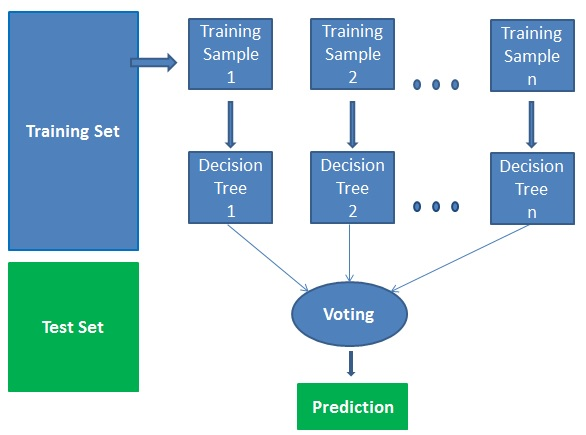

## Building a Random Forest Classifier using `scikit-learn`

In this tutorial we use `scikit-learn` - Python machine learning tools for predictive data analysis. We will use [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) to build our classifier.

In [1]:
#Important data structure library
import pandas as pd

#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
# iris = datasets.load_iris()
cancer = datasets.load_breast_cancer()

# Convert it to Pandas dataframe
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df["label"] = cancer.target


### Inspect dataset
Print the target and feature names, to make sure we have the right dataset, as such:

In [2]:
# print the cancer target label: 0 = malignant, 1 = benign)
print("Label names: ", cancer.target_names)

# print the names of the four features
print("Features (variables/attributes):", cancer.feature_names)

Label names:  ['malignant' 'benign']
Features (variables/attributes): ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
# Print the first 5 rows dataset
# df.head()
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
# Number of features
print("Number of features:", len(df.columns)-1)

# Size of class 0: malignant
print("Class 0:", len(df.loc[df['label'] == 0]))

# Size of class 1: benign
print("Class 1: ", len(df.loc[df['label'] == 1]))

Number of features: 30
Class 0: 212
Class 1:  357


### Build RF Classifier
Separate the columns into dependent and independent variables (or features and labels). Then you split those variables into a training and test set using `train_test_split()` function.

In [6]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Features
X = df.iloc[:,0:30]
# Labels
y=df["label"]  

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 

### Train and Test
Train the model using `RandomForestClassifier` on the training set (70%) and perform predictions on the test set (30%).

In [7]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
rf_model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
rf_model.fit(X_train,y_train)

# Test using test set
y_pred=rf_model.predict(X_test)

### Evaluate RF Model

Performance metrics:

1. Accuracy - [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
2. Area Under the ROC Curve (AUC) - [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

We evaluate prediction performance using the above performance metrics over test data actual and predicted values.



In [8]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model AUC, how much the model is capable of distinguishing between classes?
auc = metrics.roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print("AUC", auc)

Accuracy: 0.9590643274853801
AUC 0.9834258177570093


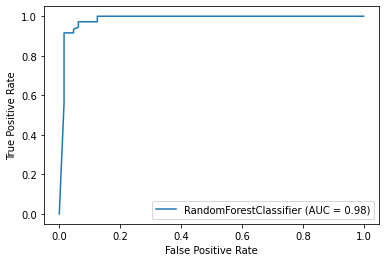

In [10]:
#  ROC curve plot
metrics.plot_roc_curve(rf_model, X_test, y_test)

## Build Support Vector Machine Classifier

In the SVM algorithm, we plot each data item as a point in `n`-dimensional space (where `n` is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well (look at the below snapshot):

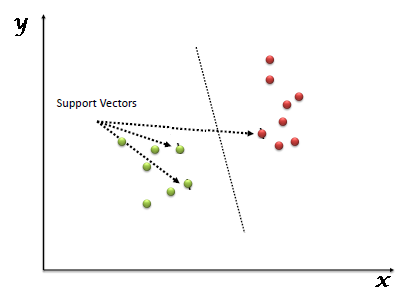

The steps involved are more or less similar to RF:

1. Load the data
2. Create training and test split
3. *Perform feature scaling*
4. Instantiate an SVC classifier
5. Train the model
6. Evaluate model performance

We will use `sklearn` C-Support Vector Classification library . Details about this function can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [11]:
# Import SVM library
from sklearn.svm import SVC

# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, kernel='linear', probability=True)
 
# Train the model
svm_model = svc.fit(X_train, y_train)

# Make the predictions on test dataset
y_pred = svc.predict(X_test)

### Evaluate SVM Model

Performance metrics:

1. Accuracy - [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
2. Area Under the ROC Curve (AUC) - [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

We evaluate prediction performance using the above performance metrics over test data actual and predicted values.

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model AUC, how much the model is capable of distinguishing between classes?
auc = metrics.roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])
print("AUC", auc)

Accuracy: 0.9532163742690059
AUC 0.9922605140186915


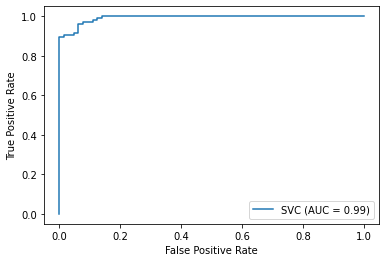

In [13]:
#  ROC curve plot
metrics.plot_roc_curve(svm_model, X_test, y_test) 

### Build Naive Bayes Classifier

Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier assumes that the effect of a particular feature in a class is **independent** of other features. For example, a cell cancer is determined based on various cells characteristics such as compactness, radius, concavity and so on. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence:

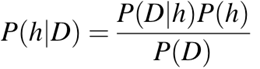

* `P(h)`: the probability of hypothesis `h` being true (regardless of the data). This is known as the prior probability of `h`.
* `P(D)`: the probability of the data (regardless of the hypothesis). This is known as the prior probability.
* `P(h|D)`: the probability of hypothesis `h` given the data `D`. This is known as posterior probability.
* `P(D|h)`: the probability of data `d` given that the hypothesis `h` was true. This is known as posterior probability.



In [15]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
nb_model = GaussianNB()

# Train the model using the training sets
nb_model.fit(X_train, y_train)

# Make the predictions on test dataset
y_pred = nb_model.predict(X_test)

### Evaluate NB Model

Performance metrics:

1. Accuracy - [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
2. Area Under the ROC Curve (AUC) - [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

We evaluate prediction performance using the above performance metrics over test data actual and predicted values.

In [16]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model AUC, how much the model is capable of distinguishing between classes?
auc = metrics.roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])
print("AUC", auc)

Accuracy: 0.935672514619883
AUC 0.9832067757009346


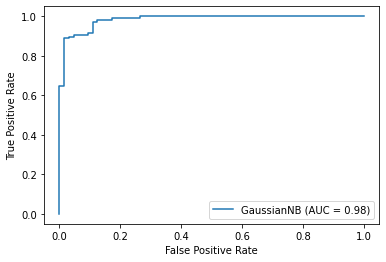

In [17]:
#  ROC curve plot
metrics.plot_roc_curve(nb_model, X_test, y_test) 